# Section 6

In [1]:
using Plots
gr()
using LaTeXStrings

In [2]:
#using Revise
using SparseIR

## Generate IR basis by singular value expansion

In [3]:
# Create kenerl for lambda_ = 100 and beta = 10
# The default value of eps ``cutoff for singular values" is
# set to 2.2e-16.
# In this sample, we compute fewer basis functions.
lambda_ = 100.0
beta = 10.0
wmax = lambda_/beta
basis = FiniteTempBasis(fermion, beta, wmax, 1e-10)

FiniteTempBasis{LogisticKernel, Float64}(fermion, 10.0, 10.0)

In [4]:
basis.u[1]([0.0, 0.01])

2-element Vector{Float64}:
 1.1275698592613543
 1.0943763277688074

## Singular values

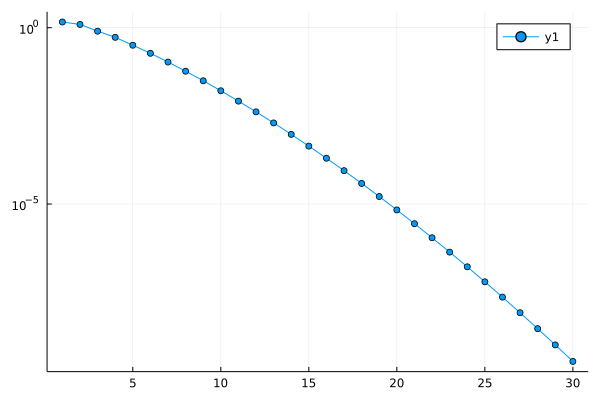

In [5]:
plot(basis.s, yaxis=:log, marker=:circle)

## $U_l(\tau)$ and $V_l(\omega)$

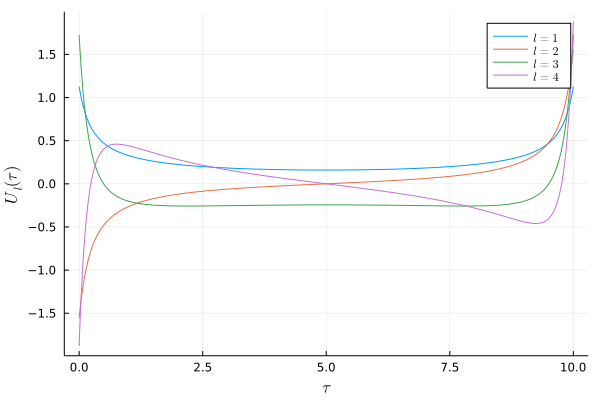

In [6]:
taus = collect(range(0, beta, length=1000))
labels = reshape([latexstring("l=$(l)") for l in 1:4], 1, :)
plot(
    taus, [basis.u[l](taus) for l in 1:4], xlabel=latexstring("\\tau"), ylabel=latexstring("U_l(\\tau)"),
    label=labels,)

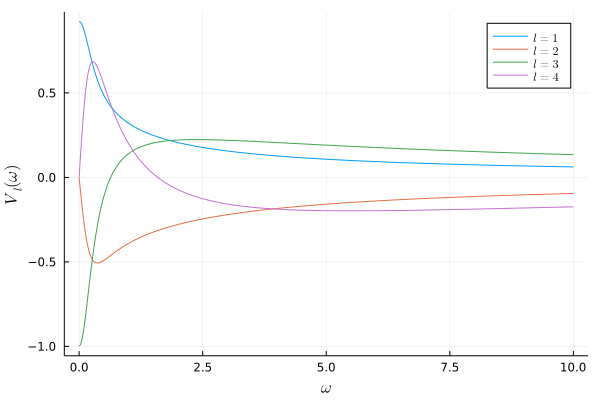

In [7]:
omegas = collect(range(-wmax, wmax, length=1000))
plot(
    taus, [basis.v[l](taus) for l in 1:4], xlabel=latexstring("\\omega"), ylabel=latexstring("V_l(\\omega)"),
    label=labels)

In [8]:
# Check orthogonality condition
for i in 1:length(basis), j in i:length(basis)
    println(i, " ", j, " ",
       sum(overlap(basis.u[i], basis.u[j]))
    )
end

1 1 0.9999999999999999
1 2 -1.1687699419393738e-16
1 3 -1.942890293094024e-16
1 4 -3.0899761915836876e-16
1 5 -4.570996359198887e-16
1 6 -4.2413988987632933e-16
1 7 -4.4278816724308e-16
1 8 -1.93421667571414e-16
1 9 8.998878031629687e-17
1 10 1.43982048506075e-16
1 11 1.93421667571414e-16
1 12 1.1449174941446927e-16
1 13 1.2576745200831851e-17
1 14 8.239936510889834e-17
1 15 2.957703526540456e-16
1 16 5.374152999785414e-16
1 17 8.552186736565659e-16
1 18 1.252917583051405e-15
1 19 1.216474837528736e-15
1 20 1.096345236817342e-15
1 21 1.0802990446645566e-15
1 22 1.2520366687862605e-15
1 23 1.4784180824012338e-15
1 24 2.0315780308033382e-15
1 25 2.869015788831142e-15
1 26 4.00677754863743e-15
1 27 5.104423828061755e-15
1 28 5.571931804837504e-15
1 29 5.880712583561376e-15
1 30 6.154365211896717e-15
2 2 1.0000000000000002
2 3 -2.740863092043355e-16
2 4 -3.857591329703425e-16
2 5 -4.887583393564654e-16
2 6 -5.121771062821523e-16
2 7 -4.2934406030425976e-16
2 8 -2.896988204881268e-16
2 9 -4

18 19 6.449485043247272e-15
18 20 6.858229262274307e-15
18 21 7.230327447871332e-15
18 22 7.562743833955388e-15
18 23 7.786523162356396e-15
18 24 7.594619377826461e-15
18 25 7.375176858115395e-15
18 26 7.1279787627887e-15
18 27 7.545288178978371e-15
18 28 7.9788064176467e-15
18 29 7.759201267609761e-15
18 30 7.600907750426877e-15
19 19 1.0000000000000067
19 20 7.212763372677067e-15
19 21 7.463430914955715e-15
19 22 7.77047697020361e-15
19 23 7.765923321079171e-15
19 24 7.422014391966769e-15
19 25 7.224255915705413e-15
19 26 7.446164995358884e-15
19 27 7.70846060593744e-15
19 28 7.593704582243427e-15
19 29 7.325872764321617e-15
19 30 7.14039287766366e-15
20 20 1.000000000000007
20 21 7.755081299354316e-15
20 22 7.671164051203938e-15
20 23 7.486416001012408e-15
20 24 7.35609489987965e-15
20 25 7.533036694429285e-15
20 26 7.861360217312208e-15
20 27 7.522628353573424e-15
20 28 7.068672903953743e-15
20 29 6.919900037097998e-15
20 30 6.758916343274635e-15
21 21 1.0000000000000075
21 22 7.39